In [ ]:
!pip3 install Distance
!pip3 install fuzzywuzzy
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output #Unknown
%matplotlib inline 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls 
import os
import datetime as dt
import gc #Garbage Collection
import re
from nltk.corpus import stopwords
import distance 
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from os import path
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
STOP_WORDS = stopwords.words('english')
from sklearn.manifold import TSNE
from PIL import Image 
from fuzzywuzzy import fuzz
import time 
import warnings 
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sys #Works with parameter
from tqdm import tqdm
import spacy #Works with different languages
import sqlite3
from sqlalchemy import create_engine
from sklearn.decomposition import TruncatedSVD #Use for dimension reduction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from collections import Counter #Uses for value count
from scipy.sparse import hstack #Uses to join multiple matrics
from sklearn.multiclass import OneVsRestClassifier #predict class
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import os
path = '/content/drive/My Drive/Dataset/trec07p/data/'
import os
t=0
d = {"ID:" : [], "Return-Path:" : [],'body:':[],"X-Spam-Checker-Version:":[],"Received:":[],"X-Spam-Level:":[],"X-Spam-Status:":[],"Message-ID:":[],"Date:":[],"From:":[],"To:":[],"MIME-Version:":[],"X-Nabble-From:":[],"X-Virus-Scanned:":[],"X-BeenThere:":[],"X-Mailman-Version:":[],"Precedence:":[],"List-Id:":[],"List:":[],"List-Unsubscribe:":[],"List-Archive:":[],"List-Post:":[],"List-Help:":[],"List-Subscribe:":[],"Content-Type:":[],"Content-Transfer-Encoding:":[],"Sender:":[],"Errors-To:":[],"Status:":[],"Content-Length:":[],"Lines:":[],"Subject:":[],"X-Priority:":[],"X-MSMail-Priority:":[],"X-Mailer:":[],"MIME-Version:":[],"X-Miltered:":[],"X-Virus-Status:":[],"X-UUID:":[],"Resent-Sender:":[],"Resent-Date:":[],"X-Loop:":[],"Errors-To:":[],"User-Agent:":[],"Class:":[]}
for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        print(name)
        if t>10:
            break
        # below printed name will be our first feature . My name is 
        # My 
        
        a = os.path.join(root, name)
        b = open(a,'r',encoding='latin-1')


        try:

            content = b.read()
        except:
            pass
        
        d['ID:'].append(name)
        d['Class:'].append("Null")
        t = t+1



        text = content.split()

        ls = ["Return-Path:","X-Spam-Checker-Version:","Received:","X-Spam-Level:","X-Spam-Status:","Message-ID:","Date:","From:","To:","MIME-Version:","X-Nabble-From:","X-Virus-Scanned:","X-BeenThere:","X-Mailman-Version:","Precedence:","List-Id:","List:","List-Unsubscribe:","List-Archive:","List-Post:","List-Help:","List-Subscribe:","Content-Type:","Content-Transfer-Encoding:","Sender:","Errors-To:","Status:","Content-Length:","Lines:","Subject:","X-Priority:","X-MSMail-Priority:","X-Mailer:","MIME-Version:","X-Miltered:","X-Virus-Status:","X-UUID:","Resent-Sender:","Resent-Date:","X-Loop:","Errors-To:","User-Agent:"]
        k = 0

        for i in text:
            string = ""
    
            if i in ls:
                if i == 'Received:':
                    continue
        
                k = text.index(i)
                k = k+1
                key=0

                if 'Content-Transfer-Encoding:' in text:
                


                    if i=='Lines:' and text.index(i) > text.index('Content-Transfer-Encoding:'):
                        d[i].append(text[k])
        

                        key=1
                    elif i == 'Content-Transfer-Encoding:':
                        key=1

                else:
                    if i == 'Lines:':
                        d[i].append(text[k])
                        key=1

                for j in range(k, len(text)):
        


                    if text[j] not in ls:
                        if key==1:
                            if j==len(text)-1:
                                d['body:'].append(string)
                                break
                            string = string + text[j+1] + " "
                        else:
                            string = string + text[j] + " "
                    else:
                        d[i].append(string)
                        break
                    if j==len(text)-1:
                        d[i].append(string)

                    if i in ls:
                        ls.remove(i)
    

print(d)
#print(type(string))
            


{'ID:': [], 'Return-Path:': [], 'body:': [], 'X-Spam-Checker-Version:': [], 'Received:': [], 'X-Spam-Level:': [], 'X-Spam-Status:': [], 'Message-ID:': [], 'Date:': [], 'From:': [], 'To:': [], 'MIME-Version:': [], 'X-Nabble-From:': [], 'X-Virus-Scanned:': [], 'X-BeenThere:': [], 'X-Mailman-Version:': [], 'Precedence:': [], 'List-Id:': [], 'List:': [], 'List-Unsubscribe:': [], 'List-Archive:': [], 'List-Post:': [], 'List-Help:': [], 'List-Subscribe:': [], 'Content-Type:': [], 'Content-Transfer-Encoding:': [], 'Sender:': [], 'Errors-To:': [], 'Status:': [], 'Content-Length:': [], 'Lines:': [], 'Subject:': [], 'X-Priority:': [], 'X-MSMail-Priority:': [], 'X-Mailer:': [], 'X-Miltered:': [], 'X-Virus-Status:': [], 'X-UUID:': [], 'Resent-Sender:': [], 'Resent-Date:': [], 'X-Loop:': [], 'User-Agent:': [], 'Class:': []}


In [ ]:
d1 = list(d.keys())
d2 = list(d.values())
n_array = []
for i in range(len(d.keys())):
    n_array.append(len(d2[i]))

n = max(n_array)

for i in range(len(d1)):
    for j in range(len(d2[i]), n):
        d[d1[i]].append("Null")


In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(d)
df.head()

,ID:,Return-Path:,body:,X-Spam-Checker-Version:,Received:,X-Spam-Level:,X-Spam-Status:,Message-ID:,Date:,From:,To:,MIME-Version:,X-Nabble-From:,X-Virus-Scanned:,X-BeenThere:,X-Mailman-Version:,Precedence:,List-Id:,List:,List-Unsubscribe:,List-Archive:,List-Post:,List-Help:,List-Subscribe:,Content-Type:,Content-Transfer-Encoding:,Sender:,Errors-To:,Status:,Content-Length:,Lines:,Subject:,X-Priority:,X-MSMail-Priority:,X-Mailer:,X-Miltered:,X-Virus-Status:,X-UUID:,Resent-Sender:,Resent-Date:,X-Loop:,User-Agent:,Class:


In [ ]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

               ID:  ... Class:
1129   inmail.9061  ...      1
1132   inmail.8931  ...      1
1133   inmail.8974  ...      1
1183   inmail.9032  ...      1
1509   inmail.8509  ...      1
...            ...  ...    ...
7006  inmail.71304  ...      1
7007  inmail.71266  ...      1
7008  inmail.71307  ...      0
7009  inmail.71392  ...      0
7010  inmail.71412  ...      0

[3568 rows x 16 columns]


In [ ]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

               ID:  ... Class:
1129   inmail.9061  ...      1
1132   inmail.8931  ...      1
1133   inmail.8974  ...      1
1183   inmail.9032  ...      1
1509   inmail.8509  ...      1
...            ...  ...    ...
7006  inmail.71304  ...      1
7007  inmail.71266  ...      1
7008  inmail.71307  ...      0
7009  inmail.71392  ...      0
7010  inmail.71412  ...      0

[3568 rows x 16 columns]
Empty DataFrame
Columns: [ID:, Return-Path:, body:, Message-ID:, Date:, From:, To:, MIME-Version:, Content-Type:, Content-Transfer-Encoding:, Status:, Content-Length:, Subject:, X-Priority:, X-Mailer:, Class:]
Index: []


In [ ]:
#Function for preprocessing data

SAFE_DIV = 0.0001 # decimal place
STOP_WORDS = stopwords.words("english")
def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    porter = PorterStemmer() # Convert all similar words to theri ideal word 
    pattern = re.compile('\W') #Find white space
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x) # Remove all html tags
        x = example1.get_text()
               
    return x

In [ ]:

lst = df.columns
ls = list(lst)
print(ls)

['ID:', 'Return-Path:', 'body:', 'Message-ID:', 'Date:', 'From:', 'To:', 'MIME-Version:', 'Content-Type:', 'Content-Transfer-Encoding:', 'Status:', 'Content-Length:', 'Subject:', 'X-Priority:', 'X-Mailer:', 'Class:']


In [ ]:
for i in range(len(ls)):
    df[ls[i]] = df[ls[i]].fillna("").apply(preprocess)

In [ ]:
df.head()

,ID:,Return-Path:,body:,Message-ID:,Date:,From:,To:,MIME-Version:,Content-Type:,Content-Transfer-Encoding:,Status:,Content-Length:,Subject:,X-Priority:,X-Mailer:,Class:
0,inmail 9496,franci 1 massage com,it is not wonder that more than 600k physician...,01c77f96 dollar 607e4b60 dollar 6c822ecf franci,sun 15 apr 2007 19 43 44 0800,ruthie woodall franci 1 massage com,the00 plg uwaterloo ca,1 0,multipart alternative boundary _nextpar...,status,o,1792 0,re,3,microsoft office outlook build 11 0 6353 x mi...,1
1,inmail 9470,root plesk1 sherweb com,html head title mouvement desjardins titl...,20070415183713 1954 qmail plesk1 sherweb com,15 apr 2007 18 37 13 0k,groupe desjardins accesd securiteaccesd des...,b0dfb7d4 speedy uwaterloo ca,1 0,text html,x priority,o,5333 0,avis important et personnel,3,microsoft office outlook build 11 0 5510 thre...,1
2,inmail 9594,pbvyaqaeo embarqhsd net,answers question yourself leads example went...,000701c77fd6 dollar 0beed980 dollar 439f2c35 i...,sun 15 apr 2007 18 25 20 0700,internal pbvyaqaeo embarqhsd net,the00 plg uwaterloo ca,1 0,multipart related boundary _nextpart_00...,message id e1hdbnd 0005nw qq ccgi01 plus net...,o,8396 0,best offer in the internet,3,evolution 1 0 5mdk,1
3,inmail 9602,wggwugnldvd msn com,all of your favorite rx meds are available 0nl...,193001c77f91 dollar 69fcde45 dollar 182ac0a1 w...,sun 15 apr 2007 17 30 27 0500 message id 6...,spie cote wggwugnldvd msn com,henna plg uwaterloo ca,1 0,text plain format flowed charset windows 12...,x priority,o,709 0,everyone require this,3 normal,microsoft outlook express 6 00 2900 2869 x mim...,1
4,inmail 9471,murielcantrell_pf itesm mx,html head title mouvement desjardins titl...,01c77f93 dollar 8bc1c340 dollar 6c822ecf moane...,sun 15 apr 2007 23 19 30 0400,muriel cantrell murielcantrell_pf itesm mx,elaastic speedy uwaterloo ca ktwarwic speed...,1 0,text html,sender,o,150 0,get a good nights rest with ambien,3 normal,microsoft outlook express v6 00 2900 2180 x mi...,1


In [ ]:
for i in range(len(df)):

    a = str(df['Return-Path:'][i]).split()
    b = str(df['Message-ID:'][i]).split()
    c = str(df['body:'][i]).split()
    d = str(df['Date:'][i]).split()
    e = str(df['From:'][i]).split()
    f = str(df['MIME-Version:'][i]).split()
    g = str(df['Content-Type:'][i]).split()
    if len(a) == 0 or len(b)==0 or len(c)==0 or len(d)==0 or len(e)==0 or len(f)==0 or len(g)==0:
        df.drop(i,inplace=True)

In [ ]:
questions = []
for i in range(len(ls)):
    if ls[i]=='ID:' or ls[i] =='Class:':
       
        continue
    else:
        df[ls[i]] = df[ls[i]].apply(lambda x: str(x))
        questions = questions + list(df[ls[i]])
        print(ls[i])

Return-Path:
body:
Message-ID:
Date:
From:
To:
MIME-Version:
Content-Type:
Content-Transfer-Encoding:
Status:
Content-Length:
Subject:
X-Priority:
X-Mailer:


In [ ]:
tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [ ]:
print(len(word2tfidf))

499525


In [ ]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

vecs1 = []

for qu1 in tqdm(list(df['body:'])):
    doc1 = nlp(qu1) 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        vec1 = word1.vector
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['body_1'] = list(vecs1)

100%|██████████| 7011/7011 [33:53<00:00,  3.45it/s]


In [ ]:
df.head()

,ID:,Return-Path:,body:,Message-ID:,Date:,From:,To:,MIME-Version:,Content-Type:,Content-Transfer-Encoding:,Status:,Content-Length:,Subject:,X-Priority:,X-Mailer:,Class:,Return_Path_1
0,inmail 9496,franci 1 massage com,it is not wonder that more than 600k physician...,01c77f96 dollar 607e4b60 dollar 6c822ecf franci,sun 15 apr 2007 19 43 44 0800,ruthie woodall franci 1 massage com,the00 plg uwaterloo ca,1 0,multipart alternative boundary _nextpar...,status,o,1792 0,re,3,microsoft office outlook build 11 0 6353 x mi...,1,"[-35.331645369529724, -18.51913332939148, -54...."
1,inmail 9470,root plesk1 sherweb com,html head title mouvement desjardins titl...,20070415183713 1954 qmail plesk1 sherweb com,15 apr 2007 18 37 13 0k,groupe desjardins accesd securiteaccesd des...,b0dfb7d4 speedy uwaterloo ca,1 0,text html,x priority,o,5333 0,avis important et personnel,3,microsoft office outlook build 11 0 5510 thre...,1,"[56.92413854598999, -24.764474153518677, -54.2..."
2,inmail 9594,pbvyaqaeo embarqhsd net,answers question yourself leads example went...,000701c77fd6 dollar 0beed980 dollar 439f2c35 i...,sun 15 apr 2007 18 25 20 0700,internal pbvyaqaeo embarqhsd net,the00 plg uwaterloo ca,1 0,multipart related boundary _nextpart_00...,message id e1hdbnd 0005nw qq ccgi01 plus net...,o,8396 0,best offer in the internet,3,evolution 1 0 5mdk,1,"[13.607078790664673, -15.118334293365479, -29...."
3,inmail 9602,wggwugnldvd msn com,all of your favorite rx meds are available 0nl...,193001c77f91 dollar 69fcde45 dollar 182ac0a1 w...,sun 15 apr 2007 17 30 27 0500 message id 6...,spie cote wggwugnldvd msn com,henna plg uwaterloo ca,1 0,text plain format flowed charset windows 12...,x priority,o,709 0,everyone require this,3 normal,microsoft outlook express 6 00 2900 2869 x mim...,1,"[30.677825212478638, -70.64773046970367, -26.1..."
4,inmail 9471,murielcantrell_pf itesm mx,html head title mouvement desjardins titl...,01c77f93 dollar 8bc1c340 dollar 6c822ecf moane...,sun 15 apr 2007 23 19 30 0400,muriel cantrell murielcantrell_pf itesm mx,elaastic speedy uwaterloo ca ktwarwic speed...,1 0,text html,sender,o,150 0,get a good nights rest with ambien,3 normal,microsoft outlook express v6 00 2900 2180 x mi...,1,"[0.23688983917236328, -35.88624048233032, -47...."


In [ ]:
df1 = pd.DataFrame(df.Return_Path_1.values.tolist(), index= df.index)
df2 = pd.DataFrame(df.Message_ID_1.values.tolist(), index= df.index)
df3 = pd.DataFrame(df.body_1.tolist(), index= df.index)
df4 = pd.DataFrame(df.Date_1.values.tolist(), index= df.index)
df5 = pd.DataFrame(df.From_1.values.tolist(), index= df.index)
df6 = pd.DataFrame(df.MIME_Version_1.values.tolist(), index= df.index)
df7 = pd.DataFrame(df.Content_Type_1.values.tolist(), index= df.index)


In [ ]:
df1['ID:'] = df['ID:']
df2['ID:'] = df['ID:']
df3['ID:'] = df['ID:']
df4['ID:'] = df['ID:']
df5['ID:'] = df['ID:']
df6['ID:'] = df['ID:']
df7['ID:'] = df['ID:']

In [ ]:
df1  = df1.merge(df7, on='ID:',how='left')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7011 entries, 0 to 7010
Columns: 673 entries, 0_x to 95
dtypes: float64(672), object(1)
memory usage: 36.1+ MB


In [ ]:
df.head()
alamin = df.drop(['Return-Path:','body:','Message-ID:','Date:','From:','To:','MIME-Version:','Content-Type:','Content-Transfer-Encoding:','Status:','Content-Length:','Subject:','X-Priority:','X-Mailer:','From1','Return_Path_1:','body_1','Message-ID_1','MDate_1','Date_1','MIME-Version_1','Content-Type_1','From_1','Return-Path_1','MIME_Version_1','Content_Type_1','Message_ID_1','Return_Path_1'],axis=1)

In [ ]:
df1  = df1.merge(alamin, on='ID:',how='left')

In [ ]:
df1.head()

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,...,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,Class:
0,-35.331645,-18.519133,-54.901639,8.374129,59.560343,30.803266,-9.804384,27.215351,17.827635,61.728278,21.308967,15.908733,-16.538650,-50.409448,-18.192658,48.915646,-22.199788,30.848084,-31.436278,11.225466,-26.856264,31.383263,-1.547813,-7.971125,-70.973234,9.629258,-54.605322,-37.396440,50.795405,-54.875698,61.346302,25.704227,-5.274977,-67.357070,-9.575902,-4.588630,36.492906,-51.478992,-43.913187,34.794531,...,0.891550,48.047021,-12.122267,29.822642,-22.559388,40.083563,-38.880186,22.011835,8.839374,-8.233423,-20.824193,-76.550686,19.036430,23.879085,32.522399,22.299479,-5.038992,-15.764381,-6.827084,1.882676,9.504472,-7.216920,-5.017639,39.398956,-40.575129,10.858024,-20.097358,45.083487,0.695985,-2.429737,-43.834047,-9.252838,24.451342,9.701948,-35.883266,-15.382731,19.808169,-13.374184,23.225210,1
1,56.924139,-24.764474,-54.268186,6.282458,31.928511,57.217599,-13.884318,34.756291,22.417945,41.550176,48.634588,-13.354011,38.318081,-93.255774,-26.022291,-24.416672,28.774319,28.257226,-18.627699,-24.612336,5.286099,3.003784,-19.133951,1.374806,-45.370360,-63.139866,-5.734812,-22.994564,104.027583,-68.898617,-0.297363,8.001610,23.638993,-42.186694,-11.866915,-35.881331,-7.843973,-37.117239,-50.365688,21.392347,...,6.752036,0.480346,-9.396846,-3.787087,-6.108561,-10.816690,2.708012,4.453442,-2.874144,3.288937,-17.244987,-11.982275,5.302845,-0.447468,12.841221,-0.521643,7.665953,-2.566460,6.927032,4.780360,-13.562782,-8.862741,0.220431,7.364157,-8.104402,-6.944097,11.392545,16.848039,10.048614,-2.588004,-4.603680,-11.961425,-2.292945,1.996275,4.884316,-11.369230,13.832966,15.200169,11.925237,1
2,13.607079,-15.118334,-29.863291,31.336640,4.068301,66.325863,9.104404,25.265680,17.507425,29.171285,45.106918,53.818901,7.619831,-15.529890,-28.236351,-6.287628,-0.087321,73.616403,19.890592,-69.463813,1.121380,-58.526782,-27.807403,-13.212983,-19.079332,-18.142206,-62.020945,-5.882610,43.133510,-44.705404,12.630483,-24.164926,-25.166340,-48.391735,-16.117099,-63.332460,61.303718,-17.622803,-24.490996,1.310892,...,34.422585,23.489347,-46.685306,1.468425,-47.222345,16.517836,-61.673635,22.211467,40.839657,43.571310,-52.363766,-47.836732,45.226983,26.597472,25.661052,0.205369,-7.416331,0.673940,-52.359738,26.497359,-7.942338,-41.028252,-22.364009,39.332710,-71.292760,-19.861041,8.947734,70.428735,-5.913227,-7.816587,-45.828678,2.955359,8.110507,72.619043,-8.546884,-11.835141,-4.639949,9.907969,26.739243,1
3,30.677825,-70.647730,-26.181594,24.354093,27.327541,76.235193,-12.261078,11.328124,25.923154,29.369489,83.604257,11.749890,59.284629,-26.536183,2.568413,15.406526,30.669721,57.072036,-15.962197,2.110931,-27.905666,-44.621985,11.503900,-39.844343,-20.258626,0.047137,-40.533422,-40.986835,23.232980,-89.410989,7.343133,-41.695869,20.906715,-14.794608,7.258939,-12.331657,43.791998,-25.914408,-20.867851,15.631552,...,84.766397,68.006490,20.175394,70.117203,-63.257525,44.263551,-30.885307,130.061258,-3.878010,55.537594,-84.144073,-39.791713,60.265144,52.972208,-27.794692,64.221892,-20.567973,-23.817613,-6.957029,100.941046,10.607828,-33.397509,-21.387459,7.809221,-119.074748,-14.716783,35.998331,58.812284,16.856200,19.378668,-26.140326,-47.061308,-34.232084,22.306914,-12.073497,-44.381516,25.660994,9.053030,52.726610,1
4,0.236890,-35.886240,-47.960072,52.540981,85.952643,67.631880,-42.969252,34.354115,25.919478,72.170153,99.749579,6.911816,31.340295,-50.252301,-74.917597,-53.450688,-18.906139,27.734004,-20.418316,14.219632,-35.674856,-66.286785,-20.199528,-36.901947,7.676909,-59.048746,-36.046147,-22.638344,61.590494,-74.384190,28.455867,-52.191006,1.503670,-16.142504,-8.800185,-95.093899,64.506125,-11.453019,-61.086789,45.9

In [ ]:
df1.to_csv('/content/drive/My Drive/Machine Learning/Real World Problem-4/spamFinal.csv',index=False)

In [ ]:
for i in range(len(ls)):
    if ls[i]=='ID:' or ls[i] =='Class:':
        continue

    else:
        vecs = []
        for qu1 in tqdm(list(df[ls[i]])):
            doc1 = nlp(qu1) 
            mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
            for word1 in doc1:
                vec1 = word1.vector
                try:
                    idf = word2tfidf[str(word1)]
                except:
                    idf = 0
                mean_vec1 += vec1 * idf
            mean_vec1 = mean_vec1.mean(axis=0)
            vecs.append(mean_vec1) 
                       
        df['feature'+str(i)] = list(vecs)              



Streaming output truncated to the last 5000 lines.
100%|██████████| 7011/7011 [35:20<00:00,  3.31it/s]

100%|██████████| 7011/7011 [01:30<00:00, 77.32it/s]

100%|██████████| 7011/7011 [02:34<00:00, 45.23it/s]

100%|██████████| 7011/7011 [01:39<00:00, 70.79it/s]

 16%|█▌        | 1125/7011 [00:15<01:17, 75.85it/s]

IndexError: ignored

In [ ]:
print('alamin'+str(2))

alamin2


In [ ]:
print(df)

               ID:  ...                                           feature5
0      inmail 9496  ...  [-37.628614127635956, -16.496613651514053, -58...
1      inmail 9470  ...  [16.818973660469055, -7.683369159698486, -87.4...
2      inmail 9594  ...  [18.538760483264923, -34.92387080192566, -9.15...
3      inmail 9602  ...  [49.59406852722168, -6.32705545425415, -41.417...
4      inmail 9471  ...  [51.589208126068115, -83.60925626754761, -72.8...
...            ...  ...                                                ...
7006  inmail 71304  ...  [39.36531913280487, -86.27515459060669, -118.2...
7007  inmail 71266  ...  [116.26423072814941, -70.01681768894196, -52.3...
7008  inmail 71307  ...  [54.782607831060886, -26.9194176197052, -2.688...
7009  inmail 71392  ...  [152.074540913105, -132.36402569897473, 38.116...
7010  inmail 71412  ...  [3.9081857204437256, -9.142731308937073, -49.6...

[7011 rows x 21 columns]


In [ ]:
df.to_csv('/content/drive/My Drive/Machine Learning/Real World Problem-4/spamfeature.csv',index=False)

In [ ]:
df.head()

,ID:,Return-Path:,body:,Message-ID:,Date:,From:,To:,MIME-Version:,Content-Type:,Content-Transfer-Encoding:,Status:,Content-Length:,Subject:,X-Priority:,X-Mailer:,Class:,body_1,Return-Path_1,Message-ID_1,Date_1,From_1,MIME-Version_1,Content-Type_1
0,inmail 9496,franci 1 massage com,it is not wonder that more than 600k physician...,01c77f96 dollar 607e4b60 dollar 6c822ecf franci,sun 15 apr 2007 19 43 44 0800,ruthie woodall franci 1 massage com,the00 plg uwaterloo ca,1 0,multipart alternative boundary _nextpar...,status,o,1792 0,re,3,microsoft office outlook build 11 0 6353 x mi...,1,"[559.3191217258573, 782.670237954706, 500.9915...","[-35.331645369529724, -18.51913332939148, -54....","[52.69948172569275, -67.40678733587265, 111.87...","[13.022768259048462, -59.25329399108887, 89.20...","[-37.628614127635956, -16.496613651514053, -58...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[56.714765548706055, -6.696223497390747, 9.949..."
1,inmail 9470,root plesk1 sherweb com,html head title mouvement desjardins titl...,20070415183713 1954 qmail plesk1 sherweb com,15 apr 2007 18 37 13 0k,groupe desjardins accesd securiteaccesd des...,b0dfb7d4 speedy uwaterloo ca,1 0,text html,x priority,o,5333 0,avis important et personnel,3,microsoft office outlook build 11 0 5510 thre...,1,"[1265.3463632836938, -981.3211324876174, -1740...","[56.92413854598999, -24.764474153518677, -54.2...","[73.59871435165405, -73.5326116681099, 19.2347...","[22.808864295482635, -88.60024738311768, 80.00...","[16.818973660469055, -7.683369159698486, -87.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.4145851135253906, -9.753661394119263, -11.6..."
2,inmail 9594,pbvyaqaeo embarqhsd net,answers question yourself leads example went...,000701c77fd6 dollar 0beed980 dollar 439f2c35 i...,sun 15 apr 2007 18 25 20 0700,internal pbvyaqaeo embarqhsd net,the00 plg uwaterloo ca,1 0,multipart related boundary _nextpart_00...,message id e1hdbnd 0005nw qq ccgi01 plus net...,o,8396 0,best offer in the internet,3,evolution 1 0 5mdk,1,"[3067.3444381952286, -3501.623762265779, -1637...","[13.607078790664673, -15.118334293365479, -29....","[59.92578935623169, -135.26589286327362, -60.7...","[2.8860535621643066, -59.8755829334259, 70.001...","[18.538760483264923, -34.92387080192566, -9.15...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[49.960854291915894, 12.154756903648376, 4.592..."
3,inmail 9602,wggwugnldvd msn com,all of your favorite rx meds are available 0nl...,193001c77f91 dollar 69fcde45 dollar 182ac0a1 w...,sun 15 apr 2007 17 30 27 0500 message id 6...,spie cote wggwugnldvd msn com,henna plg uwaterloo ca,1 0,text plain format flowed charset windows 12...,x priority,o,709 0,everyone require this,3 normal,microsoft outlook express 6 00 2900 2869 x mim...,1,"[138.33663511276245, -27.964155554771423, 48.4...","[30.677825212478638, -70.64773046970367, -26.1...","[70.1535427570343, -70.24376142024994, 47.8225...","[36.1745411157608, -125.81782710552216, 137.79...","[49.59406852722168, -6.32705545425415, -41.417...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[10.889182806015015, 14.712616324424744, -29.6..."
4,inmail 9471,murielcantrell_pf itesm mx,html head title mouvement desjardins titl...,01c77f93 dollar 8bc1c340 dollar 6c822ecf moane...,sun 15 apr 2007 23 19 30 0400,muriel cantrell murielcantrell_pf itesm mx,elaastic speedy uwaterloo ca ktwarwic speed...,1 0,text html,sender,o,150 0,get a good nights rest with ambien,3 normal,microsoft outlook express v6 00 2900 2180 x mi...,1,"[1265.3463632836938, -981.3211324876174, -1740...","[0.23688983917236328, -35.88624048233032, -47....","[62.170040011405945, -64.41956758499146, 37.91...","[0.2843902111053467, -57.21091115474701, 99.86...","[51.589208126068115, -83.60925626754761, -72.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.4145851135253906, -9.753661394119263, -11.6..."


In [ ]:
final_csv = pd.read_csv('/content/drive/My Drive/Machine Learning/Real World Problem-4/spamfeature.csv')
final_csv.head()

,ID:,Return-Path:,body:,Message-ID:,Date:,From:,To:,MIME-Version:,Content-Type:,Content-Transfer-Encoding:,Status:,Content-Length:,Subject:,X-Priority:,X-Mailer:,Class:,body_1,Return-Path_1,Message-ID_1,Date_1,From_1,MIME-Version_1,Content-Type_1
0,inmail 9496,franci 1 massage com,it is not wonder that more than 600k physician...,01c77f96 dollar 607e4b60 dollar 6c822ecf franci,sun 15 apr 2007 19 43 44 0800,ruthie woodall franci 1 massage com,the00 plg uwaterloo ca,1 0,multipart alternative boundary _nextpar...,status,o,1792 0,re,3,microsoft office outlook build 11 0 6353 x mi...,1,[ 559.31912173 782.67023795 500.99154241 ...,[-3.53316454e+01 -1.85191333e+01 -5.49016389e+...,[ 52.69948173 -67.40678734 111.87772441 2...,[ 13.02276826 -59.25329399 89.20211697 4...,[ -37.62861413 -16.49661365 -58.19811583 -...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 56.71476555 -6.6962235 9.94954872 42.18...
1,inmail 9470,root plesk1 sherweb com,html head title mouvement desjardins titl...,20070415183713 1954 qmail plesk1 sherweb com,15 apr 2007 18 37 13 0k,groupe desjardins accesd securiteaccesd des...,b0dfb7d4 speedy uwaterloo ca,1 0,text html,x priority,o,5333 0,avis important et personnel,3,microsoft office outlook build 11 0 5510 thre...,1,[ 1265.34636328 -981.32113249 -1740.3720611 ...,[ 56.92413855 -24.76447415 -54.26818562 6.28...,[ 73.59871435 -73.53261167 19.23473455 4...,[ 22.8088643 -88.60024738 80.00064373 1...,[ 16.81897366 -7.68336916 -87.49529362 ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 3.41458511 -9.75366139 -11.66587591 16.05...
2,inmail 9594,pbvyaqaeo embarqhsd net,answers question yourself leads example went...,000701c77fd6 dollar 0beed980 dollar 439f2c35 i...,sun 15 apr 2007 18 25 20 0700,internal pbvyaqaeo embarqhsd net,the00 plg uwaterloo ca,1 0,multipart related boundary _nextpart_00...,message id e1hdbnd 0005nw qq ccgi01 plus net...,o,8396 0,best offer in the internet,3,evolution 1 0 5mdk,1,[ 3067.3444382 -3501.62376227 -1637.64611779 ...,[ 1.36070788e+01 -1.51183343e+01 -2.98632914e+...,[ 59.92578936 -135.26589286 -60.70456624 17...,[ 2.88605356 -59.87558293 70.00157976 5...,[ 1.85387605e+01 -3.49238708e+01 -9.15377843e+...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 49.96085429 12.1547569 4.59299421 62.05...
3,inmail 9602,wggwugnldvd msn com,all of your favorite rx meds are available 0nl...,193001c77f91 dollar 69fcde45 dollar 182ac0a1 w...,sun 15 apr 2007 17 30 27 0500 message id 6...,spie cote wggwugnldvd msn com,henna plg uwaterloo ca,1 0,text plain format flowed charset windows 12...,x priority,o,709 0,everyone require this,3 normal,microsoft outlook express 6 00 2900 2869 x mim...,1,[ 138.33663511 -27.96415555 48.4690145 15...,[ 3.06778252e+01 -7.06477305e+01 -2.61815939e+...,[ 70.15354276 -70.24376142 47.82252371 7...,[ 36.17454112 -125.81782711 137.79172373 15...,[ 49.59406853 -6.32705545 -41.41707051 3...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 10.88918281 14.71261632 -29.69210063 2...
4,inmail 9471,murielcantrell_pf itesm mx,html head title mouvement desjardins titl...,01c77f93 dollar 8bc1c340 dollar 6c822ecf moane...,sun 15 apr 2007 23 19 30 0400,muriel cantrell murielcantrell_pf itesm mx,elaastic speedy uwaterloo ca ktwarwic speed...,1 0,text html,sender,o,150 0,get a good nights rest with ambien,3 normal,microsoft outlook express v6 00 2900 2180 x mi...,1,[ 1265.34636328 -981.32113249 -1740.3720611 ...,[ 0.23688984 -35.88624048 -47.96007156 52.54...,[ 62.17004001 -64.41956758 37.91351652 3...,[ 0.28439021 -57.21091115 99.8650856 4...,[ 51.58920813 -83.60925627 -72.85851097 10...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 3.41458511 -9.75366139 -11.66587591 16.05...


In [ ]:
df2 = final_csv

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stopwords = set(stopwords.words('english'))
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")

In [ ]:

text1 = ""
for i in range (len(df2)):
    if df2['Class:'][i]==1:
        if df2['body:'][i] not in stopwords:
            text1 = text1 + df2['body:'][i] +" "

In [ ]:
from collections import Counter
word_set = text1
# Create list of all the words in the string
word_list = word_set.split()

# Get the count of each word.
word_count = Counter(word_list)

# Use most_common() method from Counter subclass
total_word = word_count.most_common(100)

In [ ]:
text_spam = " "
for i in range(len(total_word)):
    text_spam = text_spam + str(total_word[i][0])+" "

In [ ]:
text_spam

' font td 3d the p a to and size br tr class of dollar span 0 you http 2 color html com desjardins face in your style content align i width for b 1 strong table div is href that sans border body serif it helvetica 20 style1 type with text not head arial www we x us our 4 tbody on 3 this was be family pills per bgcolor verdana percent center have as de or are r all by gif votre his estilo 009966 meta img à src cellpadding at cellspacing he own do will 5 nbsp charset '

Word Cloud for Spam for linspam dataset


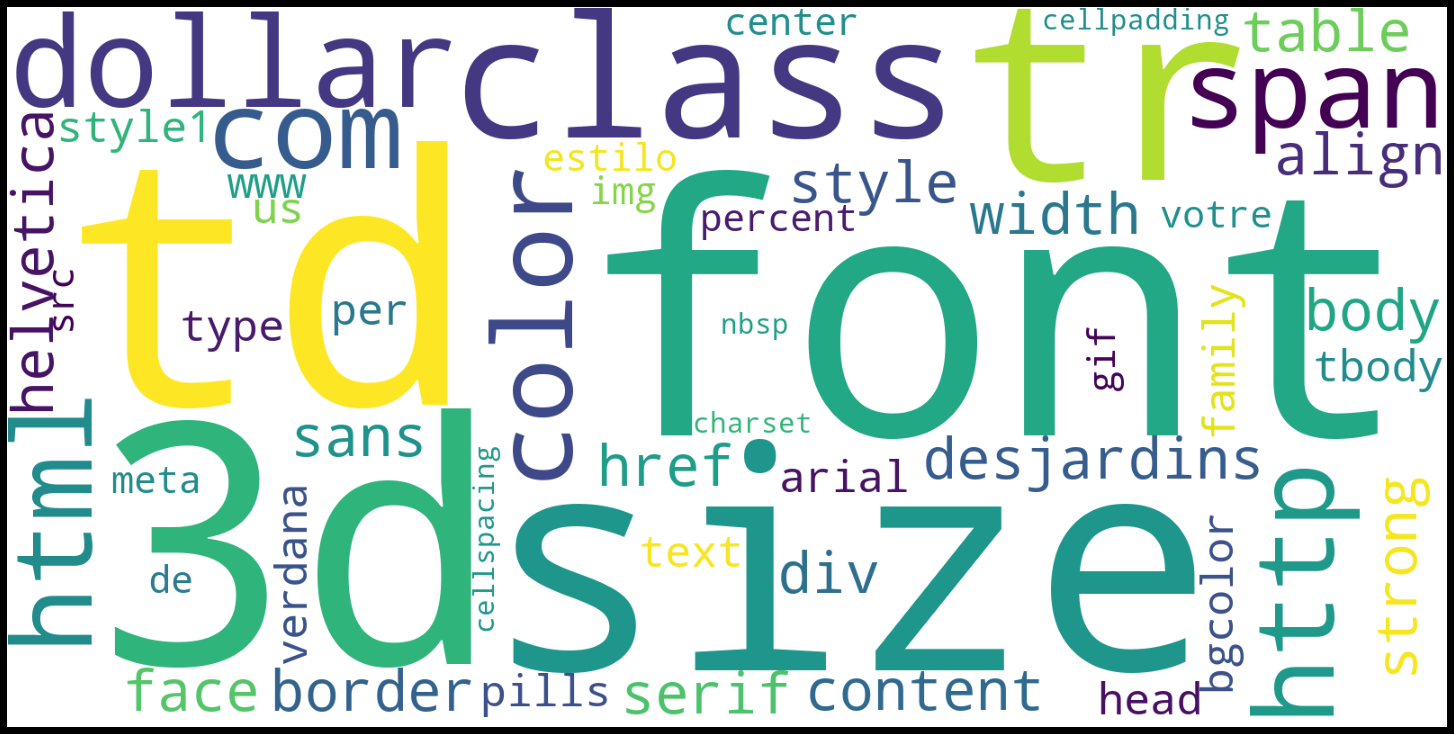

In [ ]:

wc = WordCloud(background_color="white",width=1600, height=800, stopwords=stopwords).generate(text_spam)
print ("Word Cloud for Spam for linspam dataset")
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text_file = open("/content/drive/My Drive/Machine Learning/Real World Problem-1/text_spam_enron.txt", "w")
n = text_file.write(text_spam)
text_file.close()

In [ ]:
print(final_csv['body_1'][0])

[  559.31912173   782.67023795   500.99154241    -8.84881944
  1108.77320769   624.56208189   713.12253504  1131.96524134
  1837.93740595  2611.58507564  -425.89479985   607.08659472
  -204.36705643 -1043.60711934 -1065.41893186 -1134.90723103
 -1294.1555206   -144.6104706   -968.99247079   -39.38025896
   450.50897369  -787.44398426  -987.82503766   144.87216322
 -1376.81119583   983.05561458 -1561.39291225  -637.70396583
   976.55302766  -418.14926169   966.7927667   -304.02045987
   -30.99280158 -1496.02674986   172.72878245 -1027.21736687
   924.75258876  -986.64524359 -1798.93615381   565.51521531
  1700.15481775   672.77876632  -298.06052319 -1400.48187571
    80.1458521    425.80048357    73.37129837  -474.90167091
  -555.77833195   328.55977355   482.65816171  -940.97516743
  -207.97888282  -243.78946491 -2010.69825563   630.90342788
  1549.93897712   870.76937625   801.54972756  -126.95633956
  1515.38779444  -546.08739583   710.06309502  -365.53632526
  1110.95290601    -5.55

In [ ]:
df1 = final_csv.drop(['Return-Path:','body:','Message-ID:','Date:','From:','To:','MIME-Version:','Content-Type:','Content-Transfer-Encoding:','Status:','Content-Length:','Subject:','X-Priority:','X-Mailer:'],axis=1)

In [ ]:
print(df1)

               ID:  ...                                     Content-Type_1
0      inmail 9496  ...  [ 56.71476555  -6.6962235    9.94954872  42.18...
1      inmail 9470  ...  [  3.41458511  -9.75366139 -11.66587591  16.05...
2      inmail 9594  ...  [ 49.96085429  12.1547569    4.59299421  62.05...
3      inmail 9602  ...  [  10.88918281   14.71261632  -29.69210063   2...
4      inmail 9471  ...  [  3.41458511  -9.75366139 -11.66587591  16.05...
...            ...  ...                                                ...
7006  inmail 71304  ...  [ 66.55520821 -22.78347397  11.66508389  24.88...
7007  inmail 71266  ...  [ -7.02854553  18.66853929 -38.95124856  29.61...
7008  inmail 71307  ...  [ -1.14112282  -8.13603633 -21.90465164  20.14...
7009  inmail 71392  ...  [ 100.01041988 -157.18177038  -17.13663149  20...
7010  inmail 71412  ...  [ -6.74003196  -0.69572258 -40.52141786  31.94...

[7011 rows x 9 columns]


In [ ]:
df2 = final_csv.drop(['Return-Path:','body:','Message-ID:','Date:','From:','To:','MIME-Version:','Content-Type:','Content-Transfer-Encoding:','Status:','Content-Length:','Subject:','X-Priority:','X-Mailer:','Class:'],axis=1)

In [ ]:
df2 = df2.rename({'Return-Path_1': 'Return_Path_1', 'Message-ID_1': 'Message_ID_1','MIME-Version_1': 'MIME_Version_1','Content-Type_1': 'Content_Type_1'}, axis=1)

In [ ]:
df2_f1 = pd.DataFrame(df2.body_1.values.tolist(), index= df2.index)
df2_f2 = pd.DataFrame(df2.Return_Path_1.values.tolist(), index= df2.index)
df2_f3 = pd.DataFrame(df2.Message_ID_1.tolist(), index= df2.index)
df2_f4 = pd.DataFrame(df2.Date_1.values.tolist(), index= df2.index)
df2_f5 = pd.DataFrame(df2.From_1.values.tolist(), index= df2.index)
df2_f6 = pd.DataFrame(df2.MIME_Version_1.values.tolist(), index= df2.index)
df2_f7 = pd.DataFrame(df2.Content_Type_1.values.tolist(), index= df2.index)

In [ ]:
df2_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7011 non-null   object
dtypes: object(1)
memory usage: 54.9+ KB


In [ ]:
df2_f1['ID:'] = final_csv['ID:']
df2_f2['ID:'] = final_csv['ID:']
df2_f3['ID:'] = final_csv['ID:']
df2_f4['ID:'] = final_csv['ID:']
df2_f5['ID:'] = final_csv['ID:']
df2_f6['ID:'] = final_csv['ID:']
df2_f7['ID:'] = final_csv['ID:']



In [ ]:
a  = df2_f1.merge(df2_f2, on='ID:',how='left')
b = a.merge(df2_f3, on='ID:',how='left')
c = b.merge(df2_f4, on='ID:',how='left')
d = c.merge(df2_f5, on='ID:',how='left')
e = d.merge(df2_f6, on='ID:',how='left')
f = e.merge(df2_f7, on='ID:',how='left')

In [ ]:
f.to_csv('/content/drive/My Drive/Machine Learning/Real World Problem-4/spamFinal.csv',index=False)

In [ ]:
!pip3 install Distance
!pip3 install fuzzywuzzy
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output #Unknown
%matplotlib inline 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls 
import os
import datetime as dt
import gc #Garbage Collection
import re
from nltk.corpus import stopwords
import distance 
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from os import path
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
STOP_WORDS = stopwords.words('english')
from sklearn.manifold import TSNE
from PIL import Image 
from fuzzywuzzy import fuzz
import time 
import warnings 
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sys #Works with parameter
from tqdm import tqdm
import spacy #Works with different languages
import sqlite3
from sqlalchemy import create_engine
from sklearn.decomposition import TruncatedSVD #Use for dimension reduction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from collections import Counter #Uses for value count
from scipy.sparse import hstack #Uses to join multiple matrics
from sklearn.multiclass import OneVsRestClassifier #predict class
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve



In [ ]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning/Real World Problem-4/spamFinal.csv')
df.head()

In [ ]:
data = df
y_true = data['Class:']
data.drop([ 'ID:','Class:'], axis=1, inplace=True)

In [ ]:
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)

In [ ]:
y_true = list(map(int, y_true.values))

In [ ]:
#Taking training and test data...

X_train, X_test, y_train, y_test = train_test_split(data, y_true, stratify = y_true, test_size = 0.3)
print("Number of data points in train data :", X_train.shape)
print("Number of data points in test data :", X_test.shape)

In [ ]:
#Seeing percentage of class-0 and class-1 in train and test data...

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
print(train_distr)
train_len = len(y_train)
print(train_len)
print("Class 0: ",int(train_distr[0])/train_len, "Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-" * 10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

In [ ]:
#Creating and plotting confusion matrix...

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    A = (((C.T)/(C.sum(axis=1))).T)
    B = (C/C.sum(axis=0))

    plt.figure(figsize = (20,4))
    labels = [1,2]

    cmap = sns.light_palette("blue")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot = True, cmap = cmap, fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Confusion matrix")

    plt.subplot(1,3,2)
    sns.heatmap(B, annot = True, cmap = cmap, fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot = True, cmap = cmap, fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Orziginal Class")
    plt.title("Recall matrix")

    plt.show()

In [ ]:
#We are predicting data randomly without any model...

#rand_probs = np.random.rand(1,2)
#print(rand_probs)
#result = ((rand_probs/sum(sum(rand_probs)))[0])
#print(result)
#Output: [[0.4575463  0.48507075]]
#Output: [0.48539998 0.51460002]

predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
#Logistic regression model... #Because SGDClassifier(loss = 'log')


alpha = [10 ** x for x in range(-5, 10)]

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y_2 = sig_clf.predict(X_test)
    predict_y = sig_clf.predict_proba(X_test)
    predicted_y_train = sig_clf.predict_proba(X_train)
    predicted_y_train_2 = sig_clf.predict(X_train)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha for test  = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha for train = ', i, "The log loss is:",log_loss(y_train, predicted_y_train, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict_y_2))
print(accuracy_score(y_train, predicted_y_train_2))


In [ ]:
#SVM model..Because(loss = 'hinge')

alpha = [10 ** x for x in range(-5, 2)]

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predicted_y_2 = sig_clf.predict(X_test)
    predict_y = sig_clf.predict_proba(X_test)
    predicted_y_train_2 = sig_clf.predict(X_train)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha for test = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
    
# np.round(16.05456, 2)
# Output: 16.05

# x = ('apple', 'banana', 'cherry')
# y = enumerate(x)
# Output: [(0, 'apple'), (1, 'banana'), (2, 'cherry')]

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
print(accuracy_score(y_test, predict_y_2))
print(accuracy_score(y_train, predicted_y_train_2))

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)
watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
predict_y_train = bst.predict(d_train)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

predicted_y =np.array(predict_y>0.5,dtype=int)
predicted_y_train = np.array(predict_y_train>0.5,dtype=int)
predict_y_2 = predicted_y
print(predicted_y)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
print(accuracy_score(y_test, predicted_y))
print(accuracy_score(y_train, predicted_y_train))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

predicted_y=clf.predict(X_test)
predicted_y_train = clf.predict(X_train)
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
print("The test log loss is:",log_loss(y_test, predicted_y, eps=1e-15))
print("The train log loss is:",log_loss(y_train, predicted_y_train, eps=1e-15))

In [ ]:
print(accuracy_score(y_test, predicted_y))
print(accuracy_score(y_train, predicted_y_train))